In [1]:
import os
import nltk
import nltk.corpus
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence

import matplotlib.pyplot as plt

In [2]:
file_path = "martineden.txt"  
with open(file_path, 'r', encoding='utf-8') as file:
    martineden = file.read()

print(martineden)

﻿Martin Eden

by Jack London

“Let me live out my years in heat of blood!
    Let me lie drunken with the dreamer’s wine!
Let me not see this soul-house built of mud
    Go toppling to the dust a vacant shrine!”




CHAPTER I.


The one opened the door with a latch-key and went in, followed by a
young fellow who awkwardly removed his cap. He wore rough clothes that
smacked of the sea, and he was manifestly out of place in the spacious
hall in which he found himself. He did not know what to do with his
cap, and was stuffing it into his coat pocket when the other took it
from him. The act was done quietly and naturally, and the awkward young
fellow appreciated it. “He understands,” was his thought. “He’ll see me
through all right.”

He walked at the other’s heels with a swing to his shoulders, and his
legs spread unwittingly, as if the level floors were tilting up and
sinking down to the heave and lunge of the sea. The wide rooms seemed
too narrow for his rolling gait, and to himself he 

In [3]:
for word in martineden[:500]:
    print(word,sep='',end='')

﻿Martin Eden

by Jack London

“Let me live out my years in heat of blood!
    Let me lie drunken with the dreamer’s wine!
Let me not see this soul-house built of mud
    Go toppling to the dust a vacant shrine!”




CHAPTER I.


The one opened the door with a latch-key and went in, followed by a
young fellow who awkwardly removed his cap. He wore rough clothes that
smacked of the sea, and he was manifestly out of place in the spacious
hall in which he found himself. He did not know what to do wi

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
martineden_tokens=word_tokenize(martineden)
martineden_tokens

['\ufeffMartin',
 'Eden',
 'by',
 'Jack',
 'London',
 '“',
 'Let',
 'me',
 'live',
 'out',
 'my',
 'years',
 'in',
 'heat',
 'of',
 'blood',
 '!',
 'Let',
 'me',
 'lie',
 'drunken',
 'with',
 'the',
 'dreamer',
 '’',
 's',
 'wine',
 '!',
 'Let',
 'me',
 'not',
 'see',
 'this',
 'soul-house',
 'built',
 'of',
 'mud',
 'Go',
 'toppling',
 'to',
 'the',
 'dust',
 'a',
 'vacant',
 'shrine',
 '!',
 '”',
 'CHAPTER',
 'I',
 '.',
 'The',
 'one',
 'opened',
 'the',
 'door',
 'with',
 'a',
 'latch-key',
 'and',
 'went',
 'in',
 ',',
 'followed',
 'by',
 'a',
 'young',
 'fellow',
 'who',
 'awkwardly',
 'removed',
 'his',
 'cap',
 '.',
 'He',
 'wore',
 'rough',
 'clothes',
 'that',
 'smacked',
 'of',
 'the',
 'sea',
 ',',
 'and',
 'he',
 'was',
 'manifestly',
 'out',
 'of',
 'place',
 'in',
 'the',
 'spacious',
 'hall',
 'in',
 'which',
 'he',
 'found',
 'himself',
 '.',
 'He',
 'did',
 'not',
 'know',
 'what',
 'to',
 'do',
 'with',
 'his',
 'cap',
 ',',
 'and',
 'was',
 'stuffing',
 'it',
 'into

In [7]:
len(martineden_tokens)

167270

In [8]:
from nltk.probability import FreqDist

fdist=FreqDist()

In [9]:
for word in martineden_tokens:
    fdist[word.lower()]+=1
fdist

FreqDist({',': 10376, '.': 7584, 'the': 7383, 'and': 5529, 'he': 4463, 'of': 3931, 'to': 3477, 'was': 2857, 'a': 2855, '’': 2554, ...})

In [10]:
fdist

FreqDist({',': 10376, '.': 7584, 'the': 7383, 'and': 5529, 'he': 4463, 'of': 3931, 'to': 3477, 'was': 2857, 'a': 2855, '’': 2554, ...})

In [11]:
print(fdist)

<FreqDist with 12461 samples and 167270 outcomes>


In [12]:
for word, frequency in fdist.items():
    print(f'{word}: {frequency}')

﻿martin: 1
eden: 98
by: 557
jack: 1
london: 5
“: 2211
let: 72
me: 407
live: 48
out: 376
my: 250
years: 70
in: 2328
heat: 16
of: 3931
blood: 25
!: 232
lie: 18
drunken: 10
with: 1199
the: 7383
dreamer: 2
’: 2554
s: 885
wine: 21
not: 1031
see: 172
this: 321
soul-house: 1
built: 1
mud: 2
go: 160
toppling: 1
to: 3477
dust: 5
a: 2855
vacant: 2
shrine: 2
”: 2188
chapter: 51
i: 1716
.: 7584
one: 366
opened: 22
door: 47
latch-key: 2
and: 5529
went: 181
,: 10376
followed: 28
young: 85
fellow: 37
who: 281
awkwardly: 6
removed: 7
his: 2196
cap: 9
he: 4463
wore: 6
rough: 14
clothes: 40
that: 2180
smacked: 1
sea: 68
was: 2857
manifestly: 1
place: 55
spacious: 2
hall: 12
which: 325
found: 116
himself: 286
did: 420
know: 303
what: 483
do: 291
stuffing: 1
it: 2205
into: 271
coat: 17
pocket: 29
when: 418
other: 192
took: 61
from: 514
him: 1358
act: 16
done: 90
quietly: 2
naturally: 8
awkward: 13
appreciated: 10
understands: 2
thought: 217
ll: 169
through: 154
all: 616
right.: 6
walked: 19
at: 827
heels:

In [13]:
fdist_top10=fdist.most_common(10)
fdist_top10

[(',', 10376),
 ('.', 7584),
 ('the', 7383),
 ('and', 5529),
 ('he', 4463),
 ('of', 3931),
 ('to', 3477),
 ('was', 2857),
 ('a', 2855),
 ('’', 2554)]

In [14]:
from nltk.tokenize import blankline_tokenize
martineden_blank=blankline_tokenize(martineden)
len(martineden_blank)

2275

In [15]:
martineden_blank[5]

'He walked at the other’s heels with a swing to his shoulders, and his\nlegs spread unwittingly, as if the level floors were tilting up and\nsinking down to the heave and lunge of the sea. The wide rooms seemed\ntoo narrow for his rolling gait, and to himself he was in terror lest\nhis broad shoulders should collide with the doorways or sweep the\nbric-a-brac from the low mantel. He recoiled from side to side between\nthe various objects and multiplied the hazards that in reality lodged\nonly in his mind. Between a grand piano and a centre-table piled high\nwith books was space for a half a dozen to walk abreast, yet he essayed\nit with trepidation. His heavy arms hung loosely at his sides. He did\nnot know what to do with those arms and hands, and when, to his excited\nvision, one arm seemed liable to brush against the books on the table,\nhe lurched away like a frightened horse, barely missing the piano\nstool. He watched the easy walk of the other in front of him, and for\nthe first

In [16]:
import re
punctuation=re.compile(r'[-.?!,:;()|0-9¿»ï<]')

In [17]:
post_punctuation=[]
for words in martineden_tokens:
    word=punctuation.sub("",words)
    if len(word)>0:
        post_punctuation.append(word)
        

In [18]:
post_punctuation

['\ufeffMartin',
 'Eden',
 'by',
 'Jack',
 'London',
 '“',
 'Let',
 'me',
 'live',
 'out',
 'my',
 'years',
 'in',
 'heat',
 'of',
 'blood',
 'Let',
 'me',
 'lie',
 'drunken',
 'with',
 'the',
 'dreamer',
 '’',
 's',
 'wine',
 'Let',
 'me',
 'not',
 'see',
 'this',
 'soulhouse',
 'built',
 'of',
 'mud',
 'Go',
 'toppling',
 'to',
 'the',
 'dust',
 'a',
 'vacant',
 'shrine',
 '”',
 'CHAPTER',
 'I',
 'The',
 'one',
 'opened',
 'the',
 'door',
 'with',
 'a',
 'latchkey',
 'and',
 'went',
 'in',
 'followed',
 'by',
 'a',
 'young',
 'fellow',
 'who',
 'awkwardly',
 'removed',
 'his',
 'cap',
 'He',
 'wore',
 'rough',
 'clothes',
 'that',
 'smacked',
 'of',
 'the',
 'sea',
 'and',
 'he',
 'was',
 'manifestly',
 'out',
 'of',
 'place',
 'in',
 'the',
 'spacious',
 'hall',
 'in',
 'which',
 'he',
 'found',
 'himself',
 'He',
 'did',
 'not',
 'know',
 'what',
 'to',
 'do',
 'with',
 'his',
 'cap',
 'and',
 'was',
 'stuffing',
 'it',
 'into',
 'his',
 'coat',
 'pocket',
 'when',
 'the',
 'other'

In [19]:
# mapping characters with integers
unique_chars = sorted(list(set(martineden)))

char_to_int = {}
int_to_char = {}

for i, c in enumerate (unique_chars):
    char_to_int.update({c: i})
    int_to_char.update({i: c})

In [20]:
print(unique_chars)

['\n', ' ', '!', '$', '%', '&', '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'Æ', 'à', 'ä', 'é', 'ô', 'ö', '—', '‘', '’', '“', '”', '\ufeff']


In [21]:
# preparing input and output dataset
X = []
Y = []

for i in range(0, len(martineden) - 50, 1):
    sequence = martineden[i:i + 50] # save the first 49 characters as input
    label = martineden[i + 50] # the 50th  character as output
    X.append([char_to_int[char] for char in sequence])
    Y.append(char_to_int[label])

In [22]:
from keras.utils import np_utils
# reshaping, normalizing and one hot encoding
X_modified = np.reshape(X, (len(X), 50, 1))
X_modified = X_modified / float(len(unique_chars))
Y_modified = np_utils.to_categorical(Y)
X_modified

array([[[0.98876404],
        [0.40449438],
        [0.57303371],
        ...,
        [0.70786517],
        [0.84269663],
        [0.01123596]],

       [[0.40449438],
        [0.57303371],
        [0.76404494],
        ...,
        [0.84269663],
        [0.01123596],
        [0.84269663]],

       [[0.57303371],
        [0.76404494],
        [0.78651685],
        ...,
        [0.01123596],
        [0.84269663],
        [0.61797753]],

       ...,

       [[0.71910112],
        [0.61797753],
        [0.7752809 ],
        ...,
        [0.68539326],
        [0.71910112],
        [0.73033708]],

       [[0.61797753],
        [0.7752809 ],
        [0.7752809 ],
        ...,
        [0.71910112],
        [0.73033708],
        [0.82022472]],

       [[0.7752809 ],
        [0.7752809 ],
        [0.11235955],
        ...,
        [0.73033708],
        [0.82022472],
        [0.11235955]]])

In [23]:
#Text generation with an RNN
#https://www.tensorflow.org/text/tutorials/text_generation

In [24]:
path_to_file = 'martineden.txt'
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 784031 characters


In [25]:
# Take a look at the first 250 characters in text
print(text[:250])

﻿Martin Eden

by Jack London

“Let me live out my years in heat of blood!
    Let me lie drunken with the dreamer’s wine!
Let me not see this soul-house built of mud
    Go toppling to the dust a vacant shrine!”




CHAPTER I.


The on


In [26]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

90 unique characters


In [27]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

In [28]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [29]:
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[53, 54, 55, 56, 57, 58, 59], [76, 77, 78]]>

In [30]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [31]:
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [32]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'abcdefg', b'xyz'], dtype=object)

In [33]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [34]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(784031,), dtype=int64, numpy=array([90, 38, 53, ..., 12,  2,  1], dtype=int64)>

In [35]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [36]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

﻿
M
a
r
t
i
n
 
E
d


In [37]:
seq_length = 100

In [38]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'\xef\xbb\xbf' b'M' b'a' b'r' b't' b'i' b'n' b' ' b'E' b'd' b'e' b'n'
 b'\r' b'\n' b'\r' b'\n' b'b' b'y' b' ' b'J' b'a' b'c' b'k' b' ' b'L' b'o'
 b'n' b'd' b'o' b'n' b'\r' b'\n' b'\r' b'\n' b'\xe2\x80\x9c' b'L' b'e'
 b't' b' ' b'm' b'e' b' ' b'l' b'i' b'v' b'e' b' ' b'o' b'u' b't' b' '
 b'm' b'y' b' ' b'y' b'e' b'a' b'r' b's' b' ' b'i' b'n' b' ' b'h' b'e'
 b'a' b't' b' ' b'o' b'f' b' ' b'b' b'l' b'o' b'o' b'd' b'!' b'\r' b'\n'
 b' ' b' ' b' ' b' ' b'L' b'e' b't' b' ' b'm' b'e' b' ' b'l' b'i' b'e'
 b' ' b'd' b'r' b'u' b'n' b'k' b'e' b'n'], shape=(101,), dtype=string)


In [39]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'\xef\xbb\xbfMartin Eden\r\n\r\nby Jack London\r\n\r\n\xe2\x80\x9cLet me live out my years in heat of blood!\r\n    Let me lie drunken'
b' with the dreamer\xe2\x80\x99s wine!\r\nLet me not see this soul-house built of mud\r\n    Go toppling to the dust a'
b' vacant shrine!\xe2\x80\x9d\r\n\r\n\r\n\r\n\r\nCHAPTER I.\r\n\r\n\r\nThe one opened the door with a latch-key and went in, follo'
b'wed by a\r\nyoung fellow who awkwardly removed his cap. He wore rough clothes that\r\nsmacked of the sea,'
b' and he was manifestly out of place in the spacious\r\nhall in which he found himself. He did not know '


In [40]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [41]:
split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [42]:
dataset = sequences.map(split_input_target)

In [43]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'\xef\xbb\xbfMartin Eden\r\n\r\nby Jack London\r\n\r\n\xe2\x80\x9cLet me live out my years in heat of blood!\r\n    Let me lie drunke'
Target: b'Martin Eden\r\n\r\nby Jack London\r\n\r\n\xe2\x80\x9cLet me live out my years in heat of blood!\r\n    Let me lie drunken'


In [44]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [45]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [46]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [47]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [48]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 91) # (batch_size, sequence_length, vocab_size)


In [49]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  23296     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  93275     
                                                                 
Total params: 4,054,875
Trainable params: 4,054,875
Non-trainable params: 0
_________________________________________________________________


In [50]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [51]:
sampled_indices

array([84, 12, 46, 51, 54, 38, 59,  7, 17, 87, 54,  5, 19, 80,  4, 10, 75,
       65, 17, 22, 11, 50, 49, 66, 14,  3, 37,  5, 14, 25, 10, 43, 24, 66,
       62, 12, 27, 68, 79,  2, 36,  4,  5, 43, 88, 21,  3, 16, 13, 48, 57,
       81, 62, 68, 15, 43, 45,  7,  2, 16,  5, 12, 80, 63, 15, 12, 56, 50,
       13,  6, 63, 18,  5, 70, 62, 44, 15, 26, 73, 85,  2, 31, 83, 59, 64,
       38, 62, 64, 13, 62, 17, 24, 67, 51, 54, 17, 32, 89, 53, 65],
      dtype=int64)

In [52]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'n the Sunday supplement\r\nof the _San Francisco Examiner_, and guided himself by that. Three\r\ndays, a'

Next Char Predictions:
 b'\xc3\xb6.UZbMg&4\xe2\x80\x99b$6\xc3\xa0!,wm49-YXn1 L$1?,R;nj.Bp\xc3\x86\rK!$R\xe2\x80\x9c8 30We\xc3\xa4jp2RT&\r3$.\xc3\xa0k2.dY0%k5$rjS2Au\xe2\x80\x94\rF\xc3\xb4glMjl0j4;oZb4G\xe2\x80\x9dam'


In [53]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [54]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (64, 100, 91)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.511179, shape=(), dtype=float32)


In [55]:
tf.exp(example_batch_mean_loss).numpy()

91.029076

In [56]:
model.compile(optimizer='adam', loss=loss)

In [57]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [58]:
EPOCHS = 20

In [59]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
121/121 [==============================] - 241s 2s/step - loss: 2.7967
Epoch 2/20
121/121 [==============================] - 238s 2s/step - loss: 2.0990
Epoch 3/20
121/121 [==============================] - 226s 2s/step - loss: 1.8511
Epoch 4/20
121/121 [==============================] - 229s 2s/step - loss: 1.6629
Epoch 5/20
121/121 [==============================] - 228s 2s/step - loss: 1.5239
Epoch 6/20
121/121 [==============================] - 228s 2s/step - loss: 1.4227
Epoch 7/20
121/121 [==============================] - 228s 2s/step - loss: 1.3477
Epoch 8/20
121/121 [==============================] - 228s 2s/step - loss: 1.2868
Epoch 9/20
121/121 [==============================] - 228s 2s/step - loss: 1.2345
Epoch 10/20
121/121 [==============================] - 228s 2s/step - loss: 1.1869
Epoch 11/20
121/121 [==============================] - 228s 2s/step - loss: 1.1416
Epoch 12/20
121/121 [==============================] - 227s 2s/step - loss: 1.0953
Epoch 13/20
1

In [61]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [62]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [72]:
import time
start = time.time()
states = None
next_char = tf.constant(['Martin Eden:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

Martin Eden:
where he came down to pay his excital ten tingling of his
consciousness. The girl paid then a recognition of them—the great journess of her voice. Robbing
her hand in his lips spotened. He forgot that he wrote
away. At was the misapproval of her own heart repelled her. “I’m not good to take you some small fabor, Martin
Eden ’m overcourse early, and I am out of the secret
departant. I’m like the godden about some vachinery of the secrets, men to democerate
years oil. But with your nose in my vacialists that is it?”

“Oh, your books at first,’ Mr. Morse had been no gone for the height,” was the small loom of Judy
powerful. It was chilled-best. And, “Martin Eden, that’s it just for me, I
do.’ I have inside on his forty-five days so operation and your dar.”

He looked, and looked on his bed of surprise, she paused. “You don’t you,
demote, an’ what do you think of it?”

“O’, you cured me personsisted on a poet a dood,” Martin planned and blooded
begging. It was cheer; how  

__

In [73]:
class CustomTraining(MyModel):
  @tf.function
  def train_step(self, inputs):
      inputs, labels = inputs
      with tf.GradientTape() as tape:
          predictions = self(inputs, training=True)
          loss = self.loss(labels, predictions)
      grads = tape.gradient(loss, model.trainable_variables)
      self.optimizer.apply_gradients(zip(grads, model.trainable_variables))

      return {'loss': loss}

In [74]:
model = CustomTraining(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [75]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [76]:
model.fit(dataset, epochs=1)

121/121 [==============================] - 228s 2s/step - loss: 2.8060


In [78]:
EPOCHS = 10

mean = tf.metrics.Mean()

for epoch in range(EPOCHS):
    start = time.time()

    mean.reset_states()
    for (batch_n, (inp, target)) in enumerate(dataset):
        logs = model.train_step([inp, target])
        mean.update_state(logs['loss'])

        if batch_n % 50 == 0:
            template = f"Epoch {epoch+1} Batch {batch_n} Loss {logs['loss']:.4f}"
            print(template)

    # saving (checkpoint) the model every 5 epochs
    if (epoch + 1) % 5 == 0:
        model.save_weights(checkpoint_prefix.format(epoch=epoch))

    print()
    print(f'Epoch {epoch+1} Loss: {mean.result().numpy():.4f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec')
    print("_"*80)

model.save_weights(checkpoint_prefix.format(epoch=epoch))

Epoch 1 Batch 0 Loss 1.8510
Epoch 1 Batch 50 Loss 1.7683
Epoch 1 Batch 100 Loss 1.6912

Epoch 1 Loss: 1.7680
Time taken for 1 epoch 225.06 sec
________________________________________________________________________________
Epoch 2 Batch 0 Loss 1.6688
Epoch 2 Batch 50 Loss 1.6439
Epoch 2 Batch 100 Loss 1.5664

Epoch 2 Loss: 1.6055
Time taken for 1 epoch 222.91 sec
________________________________________________________________________________
Epoch 3 Batch 0 Loss 1.4863
Epoch 3 Batch 50 Loss 1.4703
Epoch 3 Batch 100 Loss 1.4787

Epoch 3 Loss: 1.4864
Time taken for 1 epoch 221.20 sec
________________________________________________________________________________
Epoch 4 Batch 0 Loss 1.4449
Epoch 4 Batch 50 Loss 1.3842
Epoch 4 Batch 100 Loss 1.4362

Epoch 4 Loss: 1.3917
Time taken for 1 epoch 220.63 sec
________________________________________________________________________________
Epoch 5 Batch 0 Loss 1.3086
Epoch 5 Batch 50 Loss 1.2921
Epoch 5 Batch 100 Loss 1.3076

Epoch 5 Loss: 1.

In [79]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

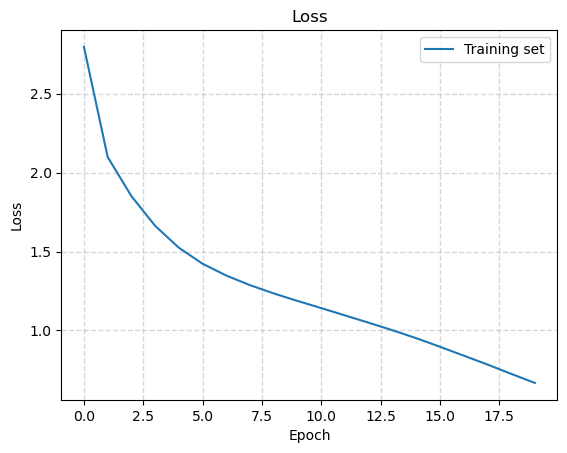

In [80]:
render_training_history(history)

In [82]:
#https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/text_generation_shakespeare_rnn/text_generation_shakespeare_rnn.ipynb

# The unique characters in the file
vocab = sorted(set(martineden))

print('{} unique characters'.format(len(vocab)))
print('vocab:', vocab)

89 unique characters
vocab: ['\n', ' ', '!', '$', '%', '&', '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'Æ', 'à', 'ä', 'é', 'ô', 'ö', '—', '‘', '’', '“', '”', '\ufeff']


In [83]:
# Map characters to their indices in vocabulary.
char2index = {char: index for index, char in enumerate(vocab)}

print('{')
for char, _ in zip(char2index, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '%' :   4,
  '&' :   5,
  '(' :   6,
  ')' :   7,
  ',' :   8,
  '-' :   9,
  '.' :  10,
  '0' :  11,
  '1' :  12,
  '2' :  13,
  '3' :  14,
  '4' :  15,
  '5' :  16,
  '6' :  17,
  '7' :  18,
  '8' :  19,
  ...
}


In [84]:
# Map character indices to characters from vacabulary.
index2char = np.array(vocab)
print(index2char)

['\n' ' ' '!' '$' '%' '&' '(' ')' ',' '-' '.' '0' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' ':' ';' '?' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L'
 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '_' 'a' 'b' 'c'
 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u'
 'v' 'w' 'x' 'y' 'z' 'Æ' 'à' 'ä' 'é' 'ô' 'ö' '—' '‘' '’' '“' '”' '\ufeff']


In [87]:
# Convert chars in text to indices.
text_as_int = np.array([char2index[char] for char in martineden])

print('text_as_int length: {}'.format(len(text_as_int)))
print('{} --> {}'.format(repr(martineden[:15]), repr(text_as_int[:15])))

text_as_int length: 769405
'\ufeffMartin Eden\n\nb' --> array([88, 36, 51, 68, 70, 59, 64,  1, 28, 54, 55, 64,  0,  0, 52])


In [88]:
# The maximum length sentence we want for a single input in characters.
sequence_length = 100
examples_per_epoch = len(text) // (sequence_length + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 7762


In [89]:
# Create training dataset.
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for char in char_dataset.take(5):
    print(index2char[char.numpy()])

﻿
M
a
r
t


In [90]:
# Generate batched sequences out of the char_dataset.
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

# Sequences size is the same as examples_per_epoch.
print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

# Sequences examples.
for item in sequences.take(5):
    print(repr(''.join(index2char[item.numpy()])))

Sequences count: 7617

'\ufeffMartin Eden\n\nby Jack London\n\n“Let me live out my years in heat of blood!\n    Let me lie drunken with'
' the dreamer’s wine!\nLet me not see this soul-house built of mud\n    Go toppling to the dust a vacant'
' shrine!”\n\n\n\n\nCHAPTER I.\n\n\nThe one opened the door with a latch-key and went in, followed by a\nyoung '
'fellow who awkwardly removed his cap. He wore rough clothes that\nsmacked of the sea, and he was manif'
'estly out of place in the spacious\nhall in which he found himself. He did not know what to do with hi'


In [91]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [92]:
dataset = sequences.map(split_input_target)

# Dataset size is the same as examples_per_epoch.
# But each element of a sequence is now has length of `sequence_length`
# and not `sequence_length + 1`.
print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

dataset size: 7617


In [93]:
for input_example, target_example in dataset.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(index2char[input_example.numpy()])))
    print('Target:', repr(''.join(index2char[target_example.numpy()])))

Input sequence size: 100
Target sequence size: 100

Input: '\ufeffMartin Eden\n\nby Jack London\n\n“Let me live out my years in heat of blood!\n    Let me lie drunken wit'
Target: 'Martin Eden\n\nby Jack London\n\n“Let me live out my years in heat of blood!\n    Let me lie drunken with'


In [94]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print('Step {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(index2char[target_idx])))

Step  0
  input: 88 ('\ufeff')
  expected output: 36 ('M')
Step  1
  input: 36 ('M')
  expected output: 51 ('a')
Step  2
  input: 51 ('a')
  expected output: 68 ('r')
Step  3
  input: 68 ('r')
  expected output: 70 ('t')
Step  4
  input: 70 ('t')
  expected output: 59 ('i')


In [95]:
# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<_BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int32, name=None), TensorSpec(shape=(64, 100), dtype=tf.int32, name=None))>

In [96]:
print('Batched dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

Batched dataset size: 119


In [97]:
for input_text, target_text in dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[55 68  1 ... 62 62  1]
 [68 55 83 ... 37 65  1]
 [55  8  1 ...  1 32 85]
 ...
 [ 1 53 65 ... 58 55  1]
 [64  1 51 ... 46 51 59]
 [71 70 58 ... 66 55 68]], shape=(64, 100), dtype=int32)

1st batch: target_text: tf.Tensor(
[[68  1 66 ... 62  1 73]
 [55 83 57 ... 65  1 62]
 [ 8  1 53 ... 32 85 63]
 ...
 [53 65 71 ... 55  1 66]
 [ 1 51 64 ... 51 59 70]
 [70 58 65 ... 55 68 51]], shape=(64, 100), dtype=int32)


In [98]:
# Let's do a quick detour and see how Embeding layer works.
# It takes several char indices sequences (batch) as an input.
# It encodes every character of every sequence to a vector of tmp_embeding_size length.
tmp_vocab_size = 10
tmp_embeding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embeding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

1/1 [==============================] - 0s 59ms/step
tmp_input_array shape: (2, 8)
tmp_input_array:
[[9 1 0 8 2 8 8 6]
 [6 3 5 2 4 0 2 4]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[ 0.0385814   0.00918316  0.01548571  0.01605814 -0.017371  ]
  [-0.00672336  0.03269616 -0.02394719  0.00321116  0.00513947]
  [-0.00598749  0.03753867 -0.0409417  -0.03581067  0.01174766]
  [-0.04634757 -0.0451325  -0.02238725  0.01465384  0.04708078]
  [ 0.01093906  0.03796461 -0.02237178 -0.00468332 -0.04261831]
  [-0.04634757 -0.0451325  -0.02238725  0.01465384  0.04708078]
  [-0.04634757 -0.0451325  -0.02238725  0.01465384  0.04708078]
  [-0.04620457  0.03897635 -0.03545135 -0.02068501 -0.037775  ]]

 [[-0.04620457  0.03897635 -0.03545135 -0.02068501 -0.037775  ]
  [-0.00994522  0.02560016  0.03335673 -0.0211983   0.04101383]
  [ 0.02133915  0.04963365  0.02424273 -0.02747989  0.00923764]
  [ 0.01093906  0.03796461 -0.02237178 -0.00468332 -0.04261831]
  [ 0.03231598 -0.00223339  0.01501364 

In [99]:
# Length of the vocabulary in chars.
vocab_size = len(vocab)

# The embedding dimension.
embedding_dim = 256

# Number of RNN units.
rnn_units = 1024

In [100]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
  
    return model

In [101]:
model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (64, None, 256)           22784     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense_2 (Dense)             (64, None, 89)            91225     
                                                                 
Total params: 5,360,985
Trainable params: 5,360,985
Non-trainable params: 0
_________________________________________________________________


In [103]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 89) # (batch_size, sequence_length, vocab_size)


In [104]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[-4.2803920e-04 -7.6252921e-04 -5.0761122e-03 -4.8199673e-03
  4.8082909e-03 -9.7732671e-05 -4.8355572e-03 -2.9320992e-03
 -3.9191423e-03 -1.0739609e-03  1.5775445e-03 -1.5854414e-03
 -1.9387668e-04  3.1654176e-04  2.0697797e-03 -1.0549061e-03
 -1.0596961e-04 -3.0546663e-03  2.4098742e-03 -4.8831301e-03
 -4.5141956e-04 -1.4546585e-03 -4.2652786e-03 -4.7460031e-03
  3.2814250e-03  5.5340417e-03  1.5715724e-03  2.4957354e-03
  4.5242254e-04  3.1990907e-03  6.4711245e-03  3.6563776e-03
  1.4945789e-04  5.2737037e-04  2.1139388e-03  8.6867693e-04
 -7.3474948e-06 -1.4331085e-03  4.9741291e-03  2.2381763e-03
  1.8627707e-04 -2.5248420e-03 -2.6243431e-03  4.2738002e-03
  8.3296746e-04 -2.1538566e-04 -1.8451859e-03 -5.1303832e-03
 -8.6772378e-04  2.6503182e-03  3.9599468e-03  6.8459543e-03
  4.5219120e-03 -6.2635378e-04  5.6742104e-03 -1.2682541e-04
 -3.6202976e-04 -2.5842590e-03  2.2724918e-03 -3.1801010e-03
  2.8150238e-03  

In [105]:
# Quick overview of how tf.random.categorical() works.

# logits is 2-D Tensor with shape [batch_size, num_classes].
# Each slice [i, :] represents the unnormalized log-probabilities for all classes.
# In the example below we say that the probability for class "0" is low but the
# probability for class "2" is much higher.
tmp_logits = [
  [-0.95, 0, 0.95],
];

# Let's generate 5 samples. Each sample is a class index. Class probabilities 
# are being taken into account (we expect to see more samples of class "2").
tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)

print(tmp_samples)

tf.Tensor([[0 2 0 1 2]], shape=(1, 5), dtype=int64)


In [106]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices.shape

TensorShape([100, 1])

In [107]:
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(100,)

In [108]:
sampled_indices

array([32, 72, 71, 65, 61, 22, 55, 44, 53, 84, 61, 86, 77, 54, 19, 42, 69,
       24, 15, 42, 25, 86, 48, 10, 25, 79, 21, 61, 58,  0, 58, 80, 30, 40,
       14,  1, 15, 58, 80, 23,  7, 13, 48, 12, 67,  7, 50, 56, 62, 54, 48,
       39, 85, 62, 57, 60, 43, 31, 37, 50, 27, 67, 27, 66,  5, 65, 16, 62,
       32, 45, 18, 64, 47, 18, 34, 83, 23, 54,  2, 43, 44, 16, 76, 11, 32,
        7, 53, 63, 70, 60, 43, 16, 34, 77, 10, 43,  1,  5,  9, 30],
      dtype=int64)

In [109]:
print('Input:\n', repr(''.join(index2char[input_example_batch[0]])))
print()
print('Next char prediction:\n', repr(''.join(index2char[sampled_indices])))

Input:
 'rstood, Mr. Eden, that we’ll mail you the check\nto-morrow?” Mr. Ford said.\n\n“I need the money to-day'

Next char prediction:
 'Ivuok;eUc‘k“Æd8SsA4SB“Y.Bä:kh\nhéGQ3 4hé?)2Y1q)_fldYP’lgjTHN_DqDp&o5lIV7nX7K—?d!TU5z0I)cmtjT5KÆ.T &-G'


In [110]:
for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
    print('Prediction {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))

Prediction  0
  input: 68 ('r')
  next predicted: 59 ('I')
Prediction  1
  input: 69 ('s')
  next predicted: 59 ('v')
Prediction  2
  input: 70 ('t')
  next predicted: 59 ('u')
Prediction  3
  input: 65 ('o')
  next predicted: 59 ('o')
Prediction  4
  input: 65 ('o')
  next predicted: 59 ('k')


In [111]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 89)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.4876885


In [112]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [113]:
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [114]:

EPOCHS=40
history = model.fit(
  x=dataset,
  epochs=EPOCHS,
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/40
119/119 [==============================] - 324s 3s/step - loss: 2.7215
Epoch 2/40
119/119 [==============================] - 428s 4s/step - loss: 2.0730
Epoch 3/40
119/119 [==============================] - 443s 4s/step - loss: 1.8099
Epoch 4/40
119/119 [==============================] - 460s 4s/step - loss: 1.6431
Epoch 5/40
119/119 [==============================] - 337s 3s/step - loss: 1.5276
Epoch 6/40
119/119 [==============================] - 311s 3s/step - loss: 1.4466
Epoch 7/40
119/119 [==============================] - 292s 2s/step - loss: 1.3862
Epoch 8/40
119/119 [==============================] - 293s 2s/step - loss: 1.3374
Epoch 9/40
119/119 [==============================] - 294s 2s/step - loss: 1.2955
Epoch 10/40
119/119 [==============================] - 294s 2s/step - loss: 1.2572
Epoch 11/40
119/119 [==============================] - 292s 2s/step - loss: 1.2214
Epoch 12/40
119/119 [==============================] - 289s 2s/step - loss: 1.1860
Epoch 13/40
1

In [115]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

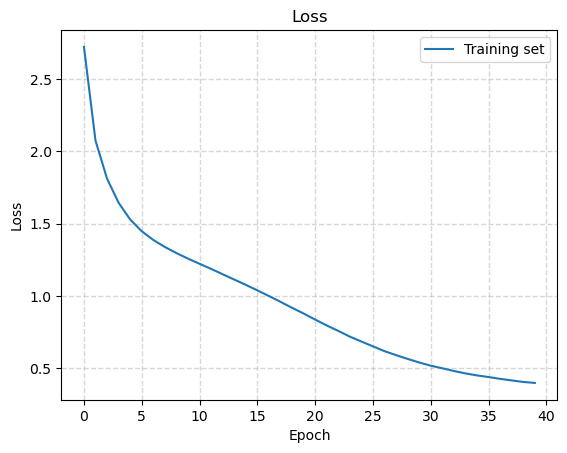

In [116]:
render_training_history(history)

In [117]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints\\ckpt_40'

In [118]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))

In [119]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (1, None, 256)            22784     
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_3 (Dense)             (1, None, 89)             91225     
                                                                 
Total params: 5,360,985
Trainable params: 5,360,985
Non-trainable params: 0
_________________________________________________________________


In [162]:
def generate_text(model, start_string, num_generate = 1000, temperature=0.5):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [166]:
# Generate the text with default temperature (0.5).
print(generate_text(model, start_string=u"Martin Eden: "))

Martin Eden: memoriant of what he
had noticed me or in some small work finish him. He had always stayed
and taken his mouth and nostrils and eyes did not explored it again, he found her in the part of her
act, and yet she did not consider high work nor the poem of the
story. The desire to do it was so taste that the women he had mentioned than
Lizzie Connolly hiding in the skirts of the crowd on the primoral life.

To his too longer still the contents of the crass blood. But his brain was weak or incapable; for
her has known what it was that? And then the magazines had proved correct.

Nor did he strayed at a whirlwind of all, she was the one thing that will make you cheh to be here?”

“Hope Hamilton’s there.” Brissenden paused and repudiated him. He was seeking a new orientation, and until that was
found his life marvelling that they let me tell you what I
ain’t up more cowardly endured.

The bay, as he remembered the day before and too weak. In a second there would have been
no licen

In [174]:
# Generate the text with higher temperature to get more unexpected results.
print(generate_text(model, start_string=u"Martin Eden: ", temperature=0.7))

Martin Eden: me me very writing that she could get a from the
other side between the acts he mustered his following
She was a most actionar as the jacting and task
the impossible, and his power beamed human and with satisfaction. He was glad the last manuscript
was sold and that he would soon be done Me.
Come on. Money in the paper a few
home, starving was that company with him, and cleared his mind.

“What I want to watch battle. Her world
was a flaw he was driven down on his knees.

“Now don’t you see!”

“Oh, good, and for five days ago.”

“For its of a month on San Francisco from Mr. Higginbotham had called
Martin the book in the froet, and the
pictures of dank he was too thrilling to the light. In the difference
serial was the only way he insisted. There was no ted
clitapper to him, but he has never were
always washed on it to the same regular or emotions he strove to follow
her. She would trave to pay him sixt and this time in the books, he
returned to a study of the present, or w